In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df=pd.read_csv('time.csv',index_col='date',parse_dates=True)
df=df.iloc[:,:-1]
df['consumption'] = df['consumption'].astype(int)
df.dropna()
df.head(5)

,connection,population,actual_limit,factor,consumption
date,,,,,
2017-01-01,4037,19373,2615355,1.193640,3121791
2017-01-02,4038,19378,2616030,1.167478,3054157
2017-01-03,4039,19383,2616705,1.145279,2996857
2017-01-04,4039,19383,2616705,1.118182,2925951
2017-01-05,4040,19387,2617245,1.136099,2973448


<Axes: xlabel='date'>

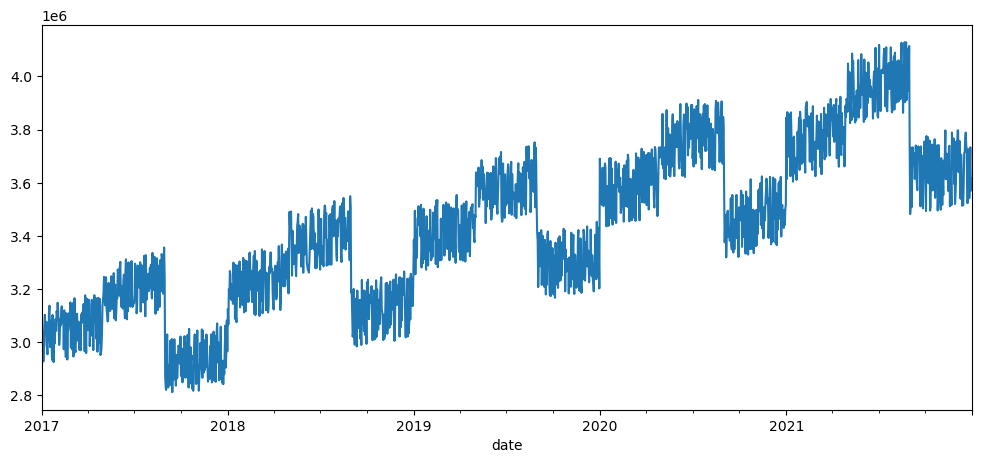

In [4]:
df['consumption'].plot(figsize=(12,5))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2017-01-01 to 2021-12-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   connection    1826 non-null   int64  
 1   population    1826 non-null   int64  
 2   actual_limit  1826 non-null   int64  
 3   factor        1826 non-null   float64
 4   consumption   1826 non-null   int32  
dtypes: float64(1), int32(1), int64(3)
memory usage: 78.5 KB


In [6]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print('ADF: ',dftest[0])
    print('P-Value: ',dftest[1])
    print('No of Lags: ',dftest[2])
    print('Num of Observation: ',dftest[3])
    print('Critical Values: ')
    for key,val in dftest[4].items():
        print("\t",key,": ",val)

In [7]:
ad_test(df['consumption'])

ADF:  -2.047604505154396
P-Value:  0.26609784403695014
No of Lags:  9
Num of Observation:  1816
Critical Values: 
	 1% :  -3.4339560393603112
	 5% :  -2.8631328654399884
	 10% :  -2.5676179883293875


In [8]:
from pmdarima import auto_arima


In [9]:
stepwise_fit = auto_arima(df['consumption'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=47096.936, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=47580.154, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=47250.033, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=47101.937, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=47578.165, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=47097.553, Time=1.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=47088.591, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=47086.812, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=47093.438, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=47160.191, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=47085.733, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=47100.707, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=47248.152, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=47087.512, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -23539.866
Date:                Mon, 16 Oct 2023   AIC                          47085.733
Time:                        20:18:27   BIC                          47102.261
Sample:                    01-01-2017   HQIC                         47091.830
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1470      0.007     21.785      0.000       0.134       0.160
ma.L1         -0.7047      0.010    -71.200      0.000      -0.724      -0.685
sigma2      8.327e+09   2.72e-13   3.06e+22      0.000    8.33e+09    8.33e+09
===================================================================================
Ljung-Box (L1) (Q):                  11.28   Jarque-Bera (JB):              6876.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.84
Prob(H) (two-sided):                  0.37   Kurtosis:                        12.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.55e+36. Standard errors may be unstable.
"""

Best model:  ARIMA(1,1,1)(0,0,0)[0] 

In [10]:
from statsmodels.tsa.arima.model  import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [11]:
train = df.iloc[:]
test = df.iloc[-365:]
print(train.shape,test.shape)

(1826, 5) (365, 5)


In [12]:
model= SARIMAX(endog=train['consumption'],order=(3,0,2),seasonal_order=(1,0,1,12))
model2 = ARIMA(train['consumption'],order=(1,1,1),seasonal_order=(1,0,1,12))
model_fit= model.fit()
model2_fit = model2.fit()


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

In [13]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          consumption   No. Observations:                 1826
Model:             SARIMAX(3, 0, 2)x(1, 0, [1], 12)   Log Likelihood              -23407.559
Date:                              Mon, 16 Oct 2023   AIC                          46831.119
Time:                                      20:18:35   BIC                          46875.198
Sample:                                  01-01-2017   HQIC                         46847.379
                                       - 12-31-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0079      0.030      0.263      0.793      -0.051       0.067
ar.L2          0.9896      0.015     65.603      0.000       0.960       1.019
ar.L3          0.0024      0.029      0.082      0.934      -0.054       0.059
ma.L1          0.2590      0.022     11.792      0.000       0.216       0.302
ma.L2         -0.7303      0.022    -32.622      0.000      -0.774      -0.686
ar.S.L12       0.9282      0.225      4.126      0.000       0.487       1.369
ma.S.L12      -0.9343      0.217     -4.307      0.000      -1.359      -0.509
sigma2      8.105e+09   9.96e-13   8.14e+21      0.000    8.11e+09    8.11e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                31.90
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.43e+38. Standard errors may be unstable.
"""

In [40]:
start_date = '2017-01-01'
end_date = '2021-12-31'
train['sarima_prediction']= model_fit.predict(start=start_date, end=end_date,dynamic=False)
train['arima_prediction']=model2_fit.predict(start=start_date, end=end_date,dynamic=False)
# train.to_csv('arima_sarima.csv')



<Axes: xlabel='date'>

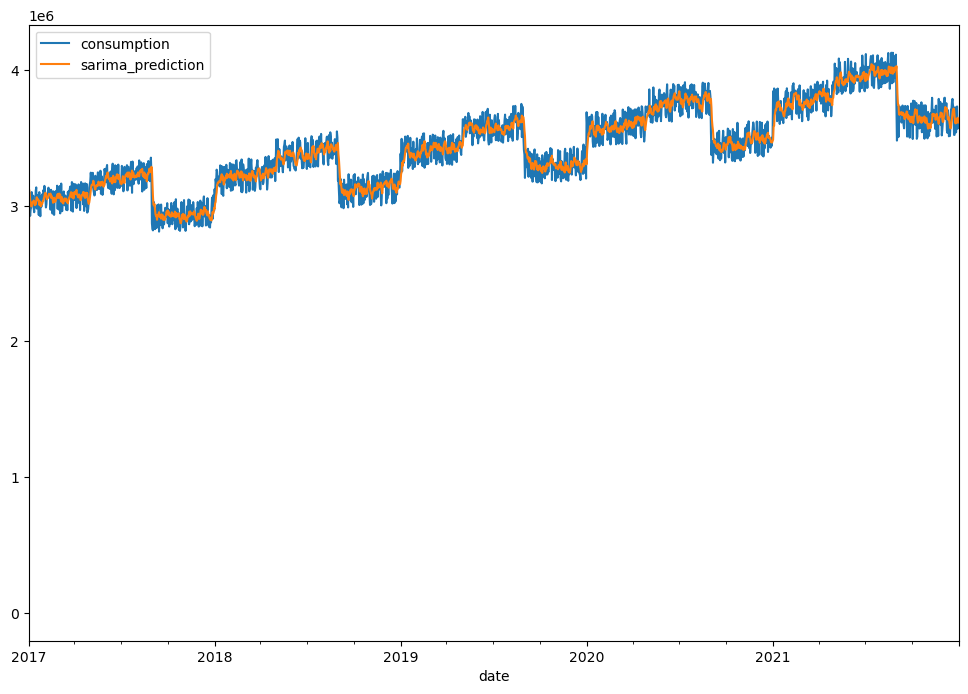

In [41]:
train[['consumption','sarima_prediction']].plot(figsize=(12,8))

<Axes: xlabel='date'>

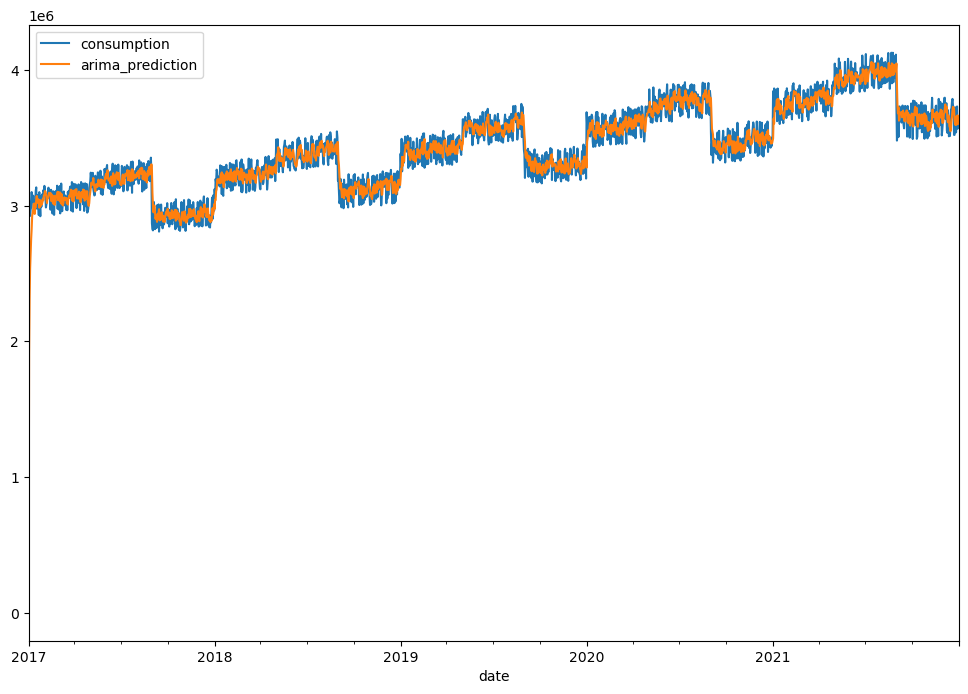

In [42]:
train[['consumption','arima_prediction']].plot(figsize=(12,8))

Sarima metrics:- 

In [43]:
y_test =train['consumption']['2020-01-01':'2020-12-30']
pred =train['sarima_prediction']['2020-01-01':'2020-12-30']

In [44]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    n = len(y_true)
    num = np.sum(np.abs(y_true - y_pred))
    denom = np.sum(np.abs(y_train[1:] - y_train[:-1])) / (n - 1)
    return num / denom

def theil_u_static(y_true, y_pred):
    numerator = np.sqrt(np.mean((y_true - y_pred) ** 2))
    denominator = np.sqrt(np.mean(y_true ** 2)) + np.sqrt(np.mean(y_pred ** 2))
    return numerator / denominator

def forecast_bias(y_true, y_pred):
    return np.mean(y_pred - y_true)

mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mase = mean_absolute_scaled_error(y_test, pred, y_test)
theil_u = theil_u_static(y_test, pred)
bias = forecast_bias(y_test, pred)

print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MASE: {mase}")
print(f"Theil U Static: {theil_u}")
print(f"Forecast Bias: {bias}")


MAE: 79084.51190050188
MAPE: 2.1949931384056334
MSE: 8859500736.135237
RMSE: 94124.9209090517
MASE: inf
Theil U Static: nan
Forecast Bias: -2328.3038994001645


In [45]:
import numpy as np

def r_squared(y_true, y_pred):
    y_bar = np.mean(y_true)
    ss_tot = np.sum((y_true - y_bar) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_res / ss_tot)

def mean_forecast_error(y_true, y_pred):
    return np.mean(y_true - y_pred)

def tracking_signal(y_true, y_pred):
    mfe = mean_forecast_error(y_true, y_pred)
    mad = np.mean(np.abs(y_true - y_pred))
    return mfe / mad if mad != 0 else np.nan

def accuracy(y_true, y_pred):
    correct = np.sum(np.abs(y_true - y_pred))

    return 100-((correct / len(y_true))/np.mean(y_true))*100

def response_time(y_true, y_pred, threshold=0.1):
    errors = np.abs(y_true - y_pred)
    return np.sum(errors <= threshold) / len(y_true)



rsquared = r_squared(y_test, pred)
mfe = mean_forecast_error(y_test, pred)
tracking_sig = tracking_signal(y_test, pred)
acc = accuracy(y_test, pred)
resp_time = response_time(y_test, pred)

print(f"R-squared: {rsquared}")
print(f"Mean Forecast Error: {mfe}")
print(f"Tracking Signal: {tracking_sig}")
print(f"Accuracy: {acc}")
print(f"Response Time: {resp_time}")


R-squared: 0.6023222288131109
Mean Forecast Error: 2328.3038994001645
Tracking Signal: 0.02944070644741994
Accuracy: 97.80955203018465
Response Time: 0.0


In [46]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, max_error
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_log_error

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate Root Mean Squared Logarithmic Error (RMSLE)
def root_mean_squared_log_error(y_true, y_pred):
    y_true_log = np.log1p(y_true)
    y_pred_log = np.log1p(y_pred)
    return np.sqrt(np.mean((y_true_log - y_pred_log) ** 2))

mape = mean_absolute_percentage_error(y_test, pred)
rmsle = root_mean_squared_log_error(y_test, pred)

# Print the calculated metrics
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
medae = median_absolute_error(y_test, pred)
evs = explained_variance_score(y_test, pred)
max_err = max_error(y_test, pred)

# Print the calculated metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Median Absolute Error (MedAE): {medae}")
print(f"Explained Variance Score (EVS): {evs}")
print(f"Max Error: {max_err}")

Mean Absolute Percentage Error (MAPE): 2.1949931384056334%
Root Mean Squared Logarithmic Error (RMSLE): 0.026188648181805513
Mean Squared Error (MSE): 8859500736.135237
Mean Absolute Error (MAE): 79084.51190050188
Median Absolute Error (MedAE): 73309.24285535468
Explained Variance Score (EVS): 0.602565562030547
Max Error: 383537.3906678604


Arima prediction

In [47]:
y_test =train['consumption']['2020-01-01':'2020-12-30']
pred =train['arima_prediction']['2020-01-01':'2020-12-30']

In [48]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    n = len(y_true)
    num = np.sum(np.abs(y_true - y_pred))
    denom = np.sum(np.abs(y_train[1:] - y_train[:-1])) / (n - 1)
    return num / denom

def theil_u_static(y_true, y_pred):
    numerator = np.sqrt(np.mean((y_true - y_pred) ** 2))
    denominator = np.sqrt(np.mean(y_true ** 2)) + np.sqrt(np.mean(y_pred ** 2))
    return numerator / denominator

def forecast_bias(y_true, y_pred):
    return np.mean(y_pred - y_true)

mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mase = mean_absolute_scaled_error(y_test, pred, y_test)
theil_u = theil_u_static(y_test, pred)
bias = forecast_bias(y_test, pred)

print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MASE: {mase}")
print(f"Theil U Static: {theil_u}")
print(f"Forecast Bias: {bias}")

import numpy as np

def r_squared(y_true, y_pred):
    y_bar = np.mean(y_true)
    ss_tot = np.sum((y_true - y_bar) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_res / ss_tot)

def mean_forecast_error(y_true, y_pred):
    return np.mean(y_true - y_pred)

def tracking_signal(y_true, y_pred):
    mfe = mean_forecast_error(y_true, y_pred)
    mad = np.mean(np.abs(y_true - y_pred))
    return mfe / mad if mad != 0 else np.nan

def accuracy(y_true, y_pred):
    correct = np.sum(np.abs(y_true - y_pred))

    return 100-((correct / len(y_true))/np.mean(y_true))*100

def response_time(y_true, y_pred, threshold=0.1):
    errors = np.abs(y_true - y_pred)
    return np.sum(errors <= threshold) / len(y_true)



rsquared = r_squared(y_test, pred)
mfe = mean_forecast_error(y_test, pred)
tracking_sig = tracking_signal(y_test, pred)
acc = accuracy(y_test, pred)
resp_time = response_time(y_test, pred)

print(f"R-squared: {rsquared}")
print(f"Mean Forecast Error: {mfe}")
print(f"Tracking Signal: {tracking_sig}")
print(f"Accuracy: {acc}")
print(f"Response Time: {resp_time}")

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, max_error
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_log_error

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate Root Mean Squared Logarithmic Error (RMSLE)
def root_mean_squared_log_error(y_true, y_pred):
    y_true_log = np.log1p(y_true)
    y_pred_log = np.log1p(y_pred)
    return np.sqrt(np.mean((y_true_log - y_pred_log) ** 2))

mape = mean_absolute_percentage_error(y_test, pred)
rmsle = root_mean_squared_log_error(y_test, pred)

# Print the calculated metrics
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
medae = median_absolute_error(y_test, pred)
evs = explained_variance_score(y_test, pred)
max_err = max_error(y_test, pred)

# Print the calculated metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Median Absolute Error (MedAE): {medae}")
print(f"Explained Variance Score (EVS): {evs}")
print(f"Max Error: {max_err}")

MAE: 80978.52907129371
MAPE: 2.2483640952919335
MSE: 9243130831.152424
RMSE: 96141.20256764226
MASE: inf
Theil U Static: nan
Forecast Bias: -1467.1301517745353
R-squared: 0.5851021657767823
Mean Forecast Error: 1467.1301517745353
Tracking Signal: 0.01811752039213839
Accuracy: 97.75709237700028
Response Time: 0.0
Mean Absolute Percentage Error (MAPE): 2.2483640952919335%
Root Mean Squared Logarithmic Error (RMSLE): 0.026772504050580178
Mean Squared Error (MSE): 9243130831.152424
Mean Absolute Error (MAE): 80978.52907129371
Median Absolute Error (MedAE): 75196.72627779143
Explained Variance Score (EVS): 0.5851987840680934
Max Error: 408049.43006067397


In [49]:
test.head(5),test.tail(5)

(            connection  population  actual_limit    factor  consumption
 date                                                                   
 2021-01-01        4962       23812       3214620  1.196174      3845245
 2021-01-02        4964       23822       3215970  1.123770      3614011
 2021-01-03        4965       23827       3216645  1.201793      3865741
 2021-01-04        4965       23827       3216645  1.172831      3772579
 2021-01-05        4966       23831       3217185  1.168712      3759964,
             connection  population  actual_limit    factor  consumption
 date                                                                   
 2021-12-27        5170       24810       3349350  1.087424      3642163
 2021-12-28        5170       24810       3349350  1.114535      3732966
 2021-12-29        5171       24815       3350025  1.065369      3569011
 2021-12-30        5172       24820       3350700  1.069975      3585164
 2021-12-31        5172       24820       3350700 

In [50]:
# # Define the number of future periods to forecast
# forecast_periods = 365  # Adjust as needed to match the length of the forecasted values

# # Extend the time index to include future dates
# start_date = pd.to_datetime('2021-01-01')  # Replace with your desired start date
# end_date = start_date + pd.DateOffset(days=forecast_periods - 1)  # Extend by 'forecast_periods - 1'

# future_date_range = pd.date_range(start=start_date, end=end_date, freq='D')
forecast_df= pd.DataFrame()
# forecast_df['forecast_data']= model_fit.predict(start='2020-01-01', end='2020-12-30',dynamic=False)
# forecast = model_fit.get_forecast(steps=365)
# forecast_df['forecast_data']= forecast.predicted_mean
# forecast_df['forecast_data']=forecast_df['forecast_data'].astype(int)
# forecast_ci = forecast.conf_int()
# forecast2 = model2_fit.get_forecast(steps=365)
# forecast_df['forecast_data2']= forecast2.predicted_mean
# forecast_df['forecast_data2']=forecast_df['forecast_data2'].astype(int)
# forecast_ci2 = forecast2.conf_int()
forecast_df['forecast_data']= model_fit.predict(start=1462,end=1826,dynamic=True)
forecast_df['forecast_data2']= model2_fit.predict(start=1462,end=1826,dynamic=True)

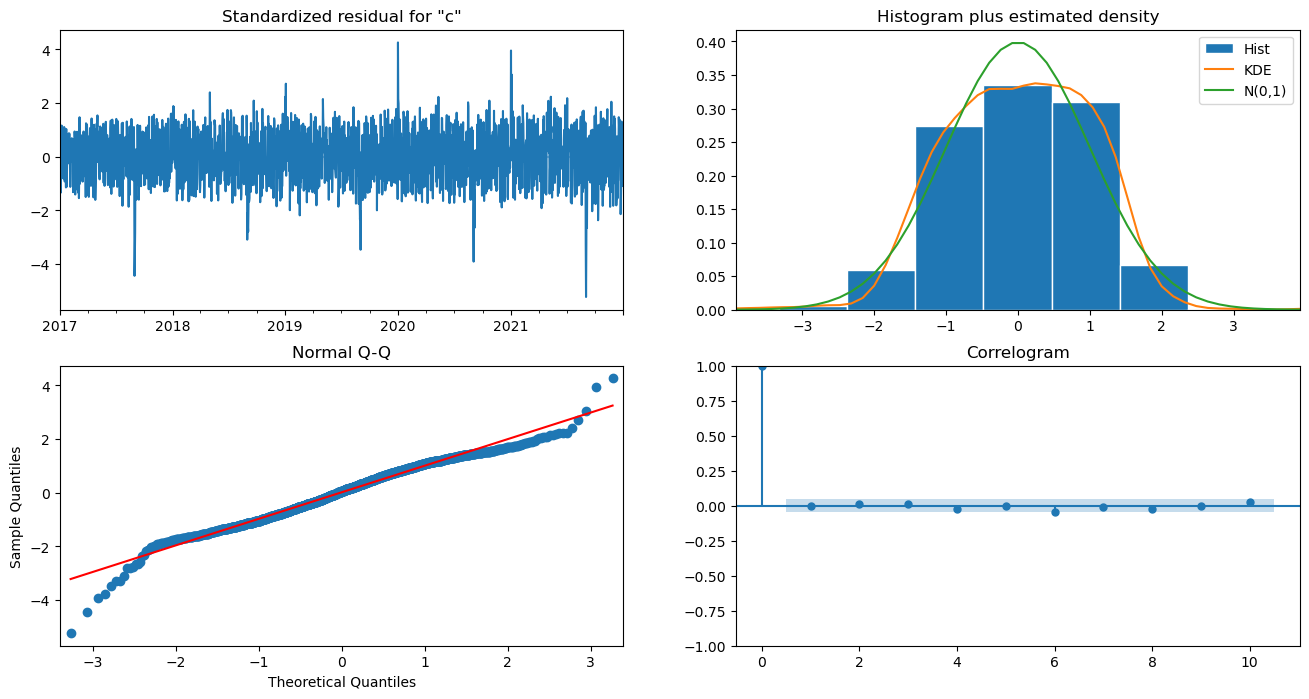

In [51]:
model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

In [52]:
forecast_df

,forecast_data,forecast_data2
2021-01-02,3.584854e+06,3.644318e+06
2021-01-03,3.582022e+06,3.620705e+06
2021-01-04,3.585483e+06,3.611087e+06
2021-01-05,3.579935e+06,3.612071e+06
2021-01-06,3.582997e+06,3.609710e+06
...,...,...
2021-12-28,3.546699e+06,3.611398e+06
2021-12-29,3.546546e+06,3.611399e+06
2021-12-30,3.546542e+06,3.611398e+06
2021-12-31,3.546162e+06,3.611398e+06


In [53]:
forecast_df.shape,test.shape

((365, 2), (365, 5))

In [54]:
forecast_df.index=test.index

In [55]:
forecast_df['actual_data']=test['consumption']

<Axes: xlabel='date'>

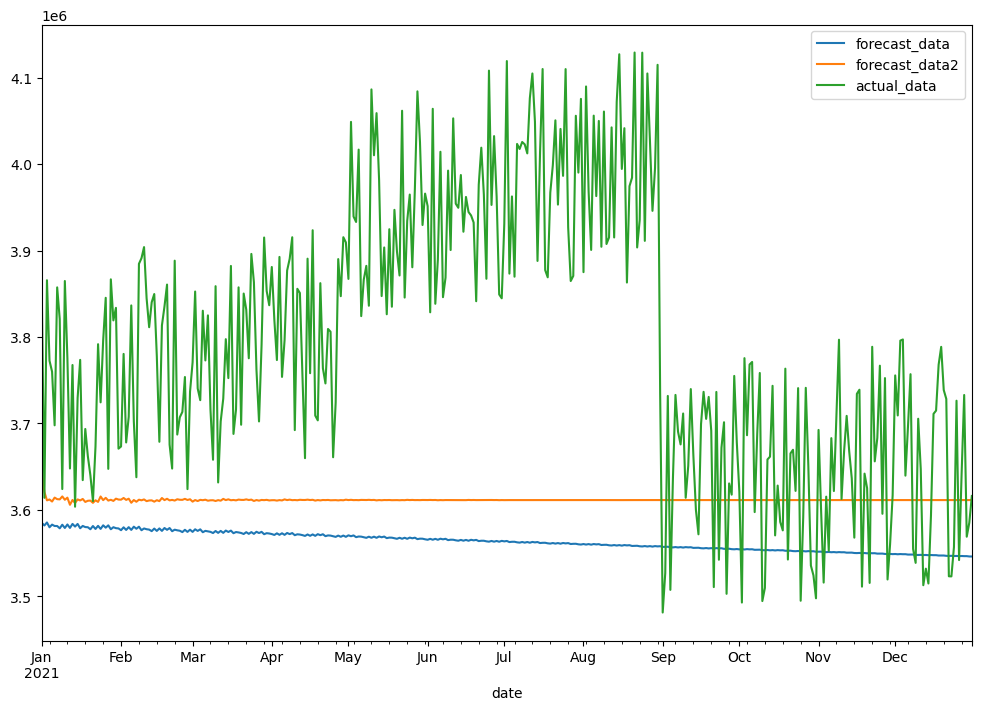

In [56]:
forecast_df[['forecast_data','forecast_data2','actual_data']].plot(figsize=(12,8))

In [57]:
# import itertools
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# # import statsmodels.api as sm
# import warnings
# warnings.filterwarnings('ignore')


(1, 0, 2, 1, 0, 1) : 12.0
(1, 0, 2, 2, 0, 1) : 14.0
(2, 0, 2, 2, 0, 2) : 18.0

In [58]:

# # Define ranges for order parameters
# p_values = [1, 2]
# d_values = [0, 1]
# q_values = [0, 1, 2]
# P_values = [0, 1, 2]
# D_values = [0, 1]
# Q_values = [0, 1, 2]

# # Perform grid search
# best_aic = float('inf')
# print(best_aic)
# best_order = None

# for order in itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values):
#     try:
#         model = SARIMAX(train['consumption'], order=(order[0],order[1],order[2]), seasonal_order=(order[3], order[4], order[5], 4))
#         results = model.fit()
#         aic = results.aic
#         print(order,':',aic)
#         if aic < best_aic:
#             print('----------------------------------->',order,':',aic)
#             best_aic = aic
#             best_order = order
#     except:
#         continue

# print("Best SARIMA Order:", best_order)

In [60]:
ploter = pd.DataFrame()
ploter['actual']=train['consumption'][-365:]
ploter['sarima']=train['sarima_prediction'][-365:]
ploter['arima']=train['arima_prediction'][-365:]
ploter

,actual,sarima,arima
date,,,
2021-01-01,3845245,3.488829e+06,3.497419e+06
2021-01-02,3614011,3.584854e+06,3.644318e+06
2021-01-03,3865741,3.589805e+06,3.607302e+06
2021-01-04,3772579,3.666765e+06,3.714436e+06
2021-01-05,3759964,3.688157e+06,3.720461e+06
...,...,...,...
2021-12-27,3642163,3.610659e+06,3.599475e+06
2021-12-28,3732966,3.621955e+06,3.620942e+06
2021-12-29,3569011,3.650203e+06,3.667442e+06


<Axes: xlabel='date'>

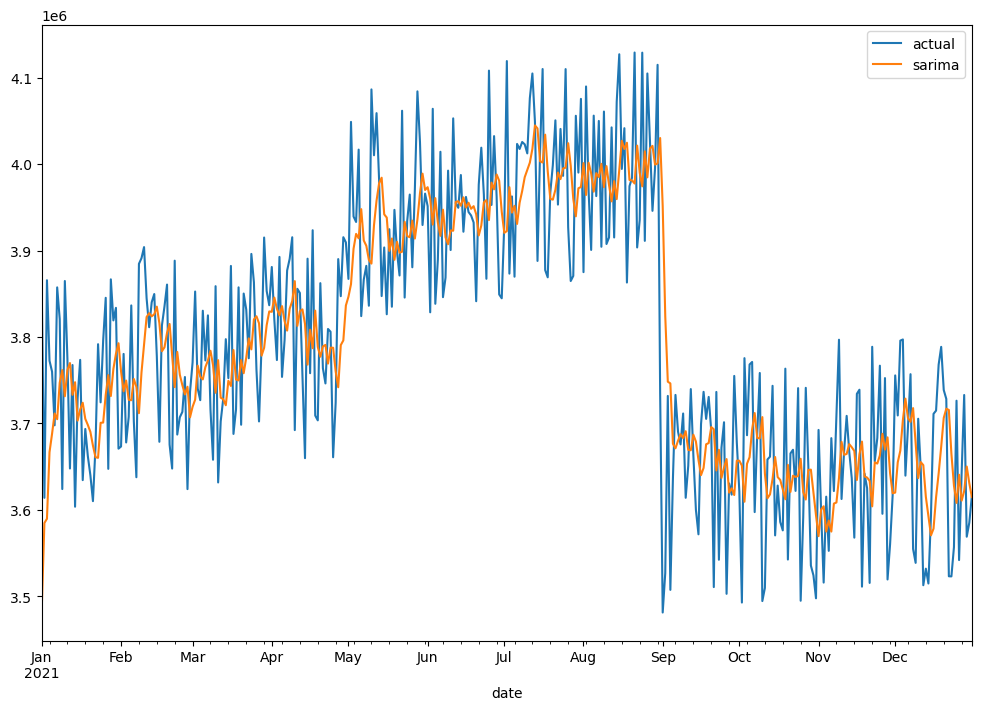

In [61]:
ploter[['actual','sarima']].plot(figsize=(12,8))

<Axes: xlabel='date'>

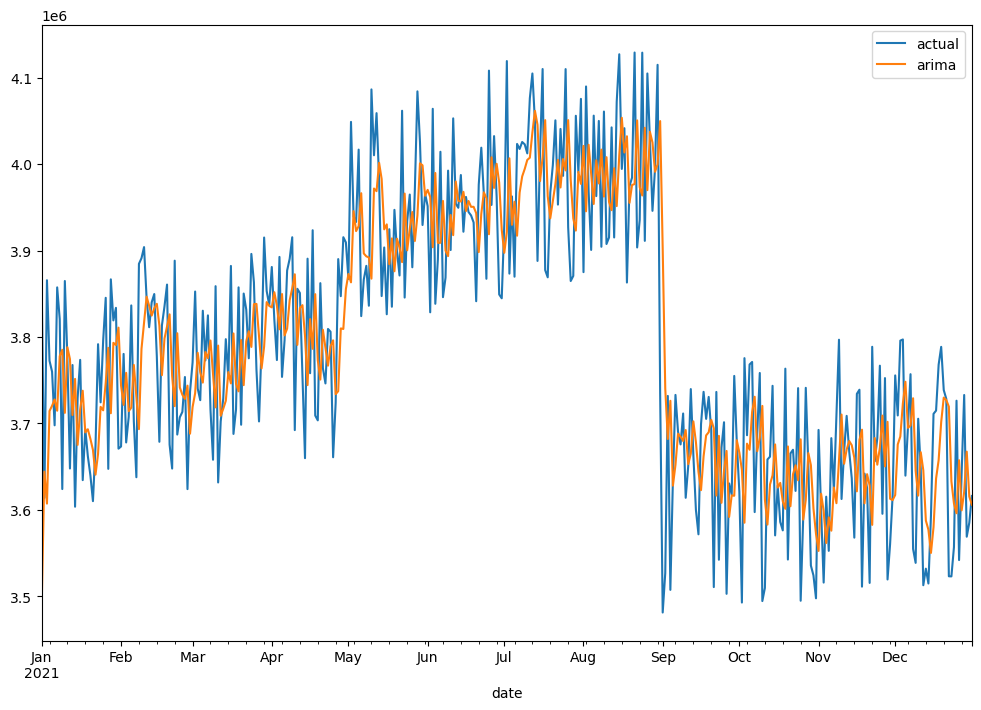

In [62]:
ploter[['actual','arima']].plot(figsize=(12,8))

In [63]:
monthly_data = ploter.resample('M').mean()

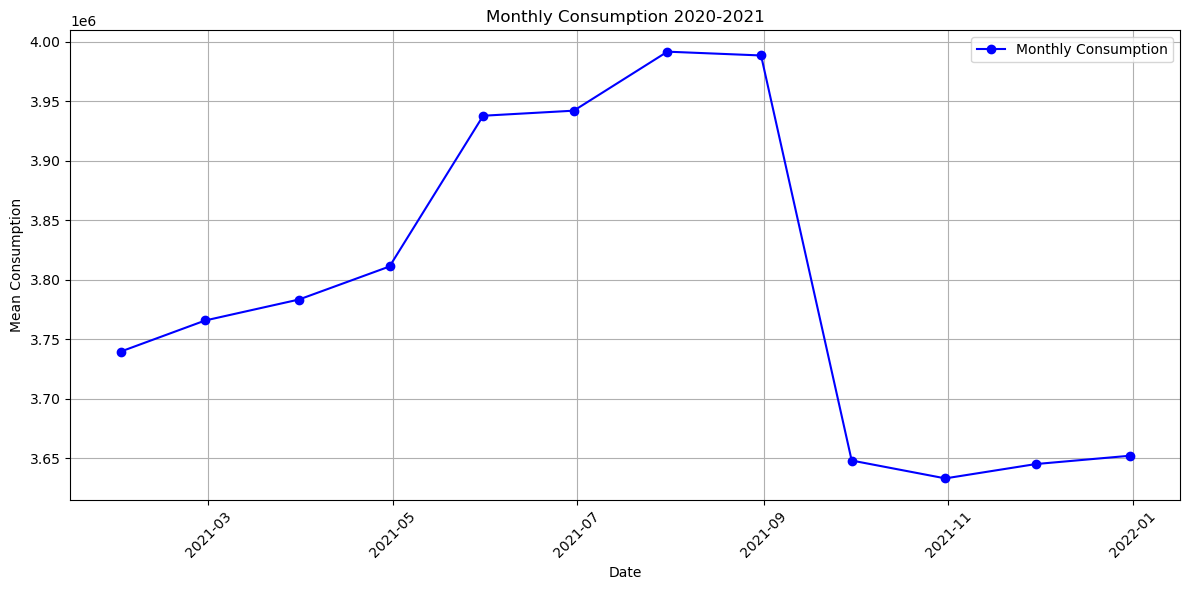

In [65]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))
# Plot the time series data
ax.plot(monthly_data.index, monthly_data['actual'], marker='o', linestyle='-', color='b', label='Monthly Consumption')

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Mean Consumption')
ax.set_title('Monthly Consumption 2020-2021')
ax.grid(True)
ax.legend()

# Show the plot

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()